# 신용카드 빅데이터를 활용한 산업군 분석
***
**경기대학교 응용통계학과 데이터 분석 동아리 D.N.A**   
심우열, 박세영, 도준희, 유소영, 이지수, 전아현

## 1. 서론
2019년 12월부터 중국 우한발 신종 코로나바이러스 감염증(코로나-19,COVID-19)이 전세계로 확산되면서 우리나라 또한 그 확산세가 전파되었다. 특히 2020년 3월 경, 신천지 관련 확진자 수가 증가하면서 대규모 확진을 방지하고자 정부 차원에서 이루어진 사회적 거리두기는 다양한 산업군에 많은 파장을 일으켰다. 이러한 과정속에서 어떤 산업군이 변화하였는지 알아본다.
<br>

## 2. 데이터 소개

 본 분석에서 사용하는 데이터는 Dacon에서 주최한 [제주 신용카드 빅데이터 경진대회](https://dacon.io/competitions/official/235615/overview)에서 제공해주는 데이터를 사용하며 이는 사용지역, 업종, 거주지역 등 준식별자로 구성된 BC카드 사용 내역이 수집되어 있다.  
 
|파일명|설명|
|------|---|
|201901-202003.csv|2019.01 ~ 2020.03 기간 내 신용카드 사용 내역 데이터|
|202004.csv|2020.04 기간 내 신용카드 사용 내역 데이터| 

크게 두개의 파일로 제공되어지며 

|변수|설명|
|------|---|
|REG_YYMM|년/월|
|CARD_SIDO_NM| 카드이용지역_시도(가맹점 주소 기준)|
|CARD_CCG_NM| 카드이용지역_시군구(가맹점 주소 기준)|
|STD_CLSS_NM|업종명|
|HOM_SIDO_NM|거주지역_시도(고객 집주소 기준)|
|HOM_CCG_NM|거주지역_시군구(고객집주소 기준)|
|AGE|연령대(10s~70s)|
|SEX_CTGO_CD|성별(남:1 ,여:2)|
|FLC|가구 생애주기<br> (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가 구, 5: 노년가구)|
|CSTMR_CNT|이용 고객수(명)|
|AMT|이용금액(원)|
|CNT|이용건수(건)|

변수는 위와 같이 구성되어 있다.

## 3. 탐색적 자료 분석(Exploratory Data Analysis)
### 3.1 라이브러리 호출 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

import os
os.chdir("D:\DATA\jeju_credit")

In [2]:
#밑에 3,4월 데이터만 추출한 파일이 있으니 이 부분은 생략해도 됩니다.
'''
credit1 = pd.read_csv("201901-202003.csv")
credit2 = pd.read_csv("202004.csv")
credit = pd.concat([credit1,credit2],axis=0)
credit.reset_index(drop=True)
'''

'\ncredit1 = pd.read_csv("201901-202003.csv")\ncredit2 = pd.read_csv("202004.csv")\ncredit = pd.concat([credit1,credit2],axis=0)\ncredit.reset_index(drop=True)\n'

---
변수명이 영어로 되어 해석하는데 어려움이 생길것을 방지하여 한글로 변환한다.

In [4]:
col = ['날짜','시도','시군구','업종','거주지역1','거주지역2','연령대','성별','가구','이용고객수','이용금액','이용건수']
credit.columns = col
credit.head()

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


---
현재 변수 업종은 국세청에서 제시한 업종 중 소분류로 분류되어 있는 업종이다. 따라서 그에 상응하는 중분류와 대분류 업종을 생성한다. 국세청에서 제공해주는 한국표준산업분류를 반영하여 병합한다.

In [7]:
industry = pd.read_csv("industry.csv",index_col=0)
industry = industry.rename(columns = {'소분류':'업종'})
credit = pd.merge(credit,industry,on='업종')
credit.head()

,날짜,시도,시군구,업종,거주지역1,거주지역2,연령대,성별,가구,이용고객수,이용금액,이용건수,대분류,중분류
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,소매업; 자동차 제외,음·식료품 및 담배 소매업
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,소매업; 자동차 제외,음·식료품 및 담배 소매업
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,소매업; 자동차 제외,음·식료품 및 담배 소매업
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,소매업; 자동차 제외,음·식료품 및 담배 소매업
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,소매업; 자동차 제외,음·식료품 및 담배 소매업


## 4. 통계적 검정을 통한 산업군 분석
 본 분석에서는 코로나 전후의 산업군을 시간적 흐름에 변화가 아닌 단순 비교 및 결론을 선언하기 때문에 코로나의 영향 직후인 2020년 3,4월과 2019년 3,4월만을 추출하여 진행한다.  

In [2]:
#credit = pd.read_csv("jeju_credit_merge.csv",index_col = 0)

In [3]:
#credit = credit[(credit.날짜 == 201903) | (credit.날짜 == 201904) | (credit.날짜 == 202003) | (credit.날짜 == 202004)]
#wcredit.to_csv("credit_marapr.csv")

In [23]:
credit = pd.read_csv("credit_marapr.csv",index_col = 0)

D:\anaconda\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [24]:
credit.reset_index(drop=True,inplace=True)

In [25]:
mark = ['건강보조식품 소매업','과실 및 채소 소매업','육류 소매업','빵 및 과자류 소매업', '수산물 소매업', '화장품 및 방향제 소매업','관광 민예품 및 선물용품 소매업']
trans = ['택시 운송업', '정기 항공 운송업','차량용 가스 충전업', '차량용 주유소 운영업', '내항 여객 운송업', '자동차 임대업']
service = ['마사지업', '욕탕업','호텔업 ', '여관업', '면세점', '여행사업', '전시 및 행사 대행업', '기타 수상오락 서비스업','골프장 운영업', '스포츠 및 레크레이션 용품 임대업']

ind = mark + trans + service

In [26]:
l = []
for i in range(len(credit)):
    if credit.업종[i] not in ind:
        l.append(i)

In [30]:
credit.drop(l,axis=0,inplace=True)

In [31]:
credit.reset_index(drop=True,inplace=True)

---
특수기호으로 인해 대분류가 사실상 같지만 다르게 표현된 것을 정제해준다.

### 4.1 대응표본에 대한 추론
대응표본은 항목, 사람 또는 물건에 대한 측정 값이 두개인 경우다. 본 분석은 대분류 산업들의 19년도 3,4월과 20년도 3,4월의 이용금액을 비교하며 각 시도내 시군구들의 월별 이용금액의 합계를 계산하여 진행한다. 단, 유의수준은 0.05로 진행한다.  

In [32]:
pivot = credit.groupby(['날짜','시도','시군구','업종'])['이용건수'].sum().reset_index()
pivot.head()

,날짜,시도,시군구,업종,이용건수
0,201903,강원,강릉시,건강보조식품 소매업,126
1,201903,강원,강릉시,골프장 운영업,679
2,201903,강원,강릉시,과실 및 채소 소매업,4186
3,201903,강원,강릉시,관광 민예품 및 선물용품 소매업,98
4,201903,강원,강릉시,마사지업,52


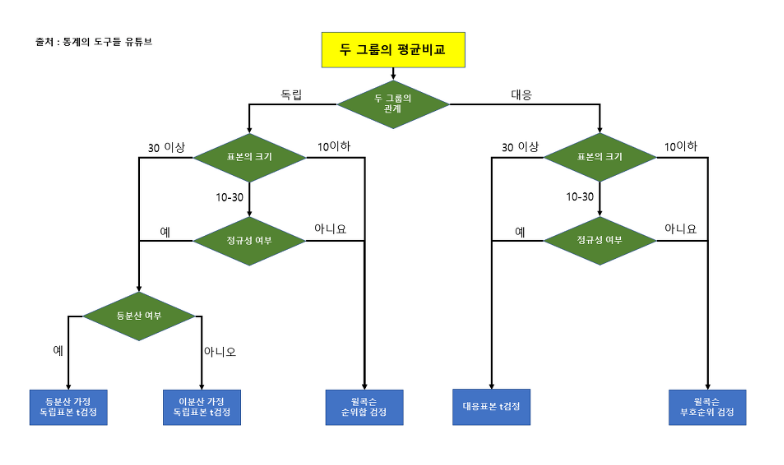

In [33]:
from IPython.display import Image
Image("t검정.png")

대응인 두 그룹을 비교하기 위해서는 대응표본 t검정과 윌콕슨 부호순위 검정 두가지의 방법이 있다. 두 방법의 가설은   
${H}_{0} : \mu_{19} = \mu_{20}$
<br>
${H}_{1} : Not {H}_{0}$   
이와 같으며 각 산업군의 정규성을 검토한 후 이에 맞는 방법을 사용하여 p-value를 도출한다.

예를 들어 서울특별시의 음식점 및 주점업이 코로나의 영향을 받았는지 알아보자

In [66]:
# 음식점 및 주점업만 해보기! 서울!
#19년도
credit19 = credit[(credit.날짜 == 201903) ]
credit19 = credit19[credit19.업종 == '빵 및 과자류 소매업']
credit19 = credit19[credit19.시도 == "광주"]

In [67]:
#20년도
credit20 = credit[(credit.날짜 == 202003) ]
credit20 = credit20[credit20.업종 =='빵 및 과자류 소매업']
credit20 = credit20[credit20.시도 == "광주"]

In [68]:
credit.업종.unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '마사지업', '빵 및 과자류 소매업', '수산물 소매업', '스포츠 및 레크레이션 용품 임대업', '여관업',
       '욕탕업', '육류 소매업', '전시 및 행사 대행업', '차량용 가스 충전업', '차량용 주유소 운영업',
       '화장품 및 방향제 소매업', '여행사업', '자동차 임대업', '면세점', '택시 운송업',
       '기타 수상오락 서비스업', '내항 여객 운송업', '정기 항공 운송업'], dtype=object)

In [69]:
before = credit19.groupby(['시군구','날짜'])['이용건수'].sum().reset_index()
after = credit20.groupby(['시군구','날짜'])['이용건수'].sum().reset_index()

In [70]:
before.head(50)

,시군구,날짜,이용건수
0,광산구,201903,48307
1,남구,201903,27004
2,동구,201903,22837
3,북구,201903,54488
4,서구,201903,45522


In [71]:
after.head()

,시군구,날짜,이용건수
0,광산구,202003,50514
1,남구,202003,28626
2,동구,202003,19810
3,북구,202003,56596
4,서구,202003,46443


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


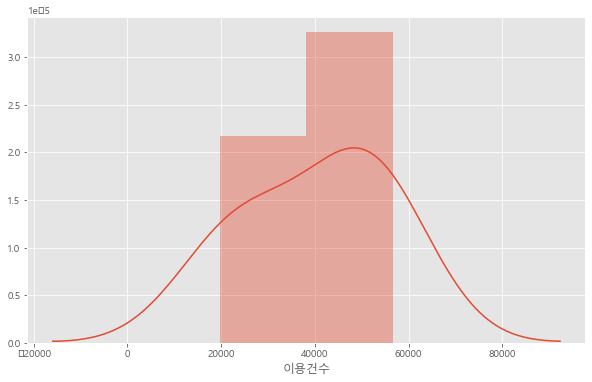

In [72]:
#이용 건수 그래프
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(after["이용건수"])

In [73]:
#정규성 검정
from scipy import stats
from scipy.stats import t
diff3 = before.이용건수 - after.이용건수

print(stats.shapiro(before.이용건수))
print(stats.shapiro(after.이용건수))
print(stats.shapiro(diff3))

ShapiroResult(statistic=0.8874765634536743, pvalue=0.34457361698150635)
ShapiroResult(statistic=0.9173117280006409, pvalue=0.5127480626106262)
ShapiroResult(statistic=0.7453242540359497, pvalue=0.02692357636988163)


In [74]:
#정규성을 만족하지 않으므로 Willcoxon's signed rank test를 진행한다.

result = stats.wilcoxon(before.이용건수,after.이용건수,
                       zero_method = 'wilcox',
                       alternative='two-sided')
#alternative
#귀무가설 기준
#올라갔는가 : greater / 낮아졌는가 : less / 양측검정 : two-sided(기본)


#0:검정통계량 1:p-value
print('t statistic : %.3f \np-value : %.3f' % (result))

t statistic : 5.000 
p-value : 0.625


3,4월 모두 19년과 20년의 p-value가 유의수준보다 크므로 귀무가설을 지지한다. 따라서 이용금액에 차이가 없다는 결론이 나온다.
<br>
이러한 분석 프로세스를 바탕으로 각 지역별 코로나의 영향이 끼친 산업군을 파악하는데 19년,20년의 산업이 없는 경우가 종종 있기에 두 해의 정보가 있는 산업군만 비교한다.

In [90]:
def rel_pvalue(data, location, industry):
    credit19 = data[(data.날짜 == 201903)]
    credit19 = credit19[credit19.업종 == industry]
    credit19 = credit19[credit19.시도 == location]
    
    credit20 = data[(data.날짜 == 202003)]
    credit20 = credit20[credit20.업종 == industry]
    credit20 = credit20[credit20.시도 == location]
    
    before = credit19.reset_index(drop=False)
    after = credit20.reset_index(drop=False)
    
    
    
        
    #대응표본 검정 실행
    if before.shape[0] == after.shape[0]:
        
       

        
        #정규성 여부에 따른 검정 과정 선택
        if len(before) >= 3:
            
             #barplot

            fig = plt.figure(figsize=(10, 3))
            plt.title(industry)
            plt.xticks(rotation = - 90 )
            #plt.bar(before.날짜,before.이용건수)
            #plt.bar(after.날짜,after.날짜)
            sns.boxplot(x="날짜", y="이용건수", data=pd.concat([before,after],axis=0))
            plt.show()
            
            
            shapiro1 = stats.shapiro(before.이용건수)[1]
            shapiro2 = stats.shapiro(after.이용건수)[1]
            print(stats.shapiro(before.이용건수))
            print(stats.shapiro(after.이용건수))
        

            if (shapiro1 >= 0.05) & (shapiro2 >= 0.05):
                result = stats.ttest_rel(before.이용건수,after.이용건수)
                #0:검정통계량 1:p-value
                print(location,"지역", industry, "의 결과 :",result)
            else :
                result = stats.wilcoxon(before.이용건수,after.이용건수,
                           zero_method = 'wilcox',
                           alternative='two-sided')

                print(location,"지역", industry, "의 결과 :",result)

        
        
        
    

#### 전남

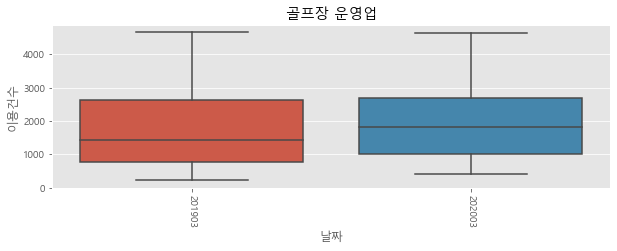

ShapiroResult(statistic=0.9125004410743713, pvalue=0.14790713787078857)
ShapiroResult(statistic=0.930741548538208, pvalue=0.27992212772369385)
전남 지역 골프장 운영업 의 결과 : Ttest_relResult(statistic=-1.6608635214635554, pvalue=0.11896239730347005)


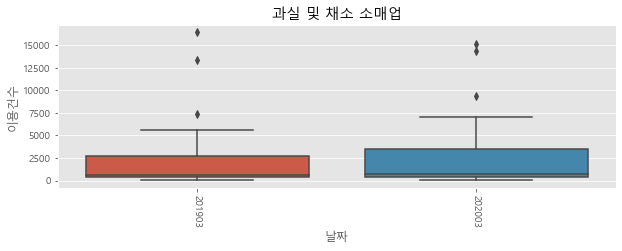

ShapiroResult(statistic=0.6119678616523743, pvalue=1.7912710745804361e-06)
ShapiroResult(statistic=0.6582428216934204, pvalue=6.023219157214044e-06)
전남 지역 과실 및 채소 소매업 의 결과 : WilcoxonResult(statistic=35.0, pvalue=0.0019183158874511719)


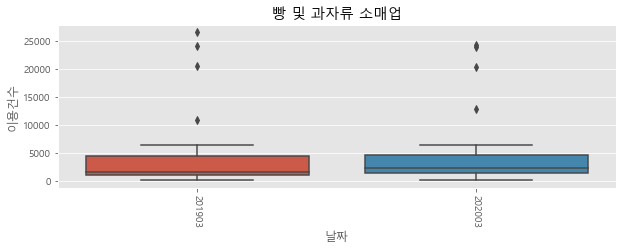

ShapiroResult(statistic=0.6301108598709106, pvalue=2.8510819447546965e-06)
ShapiroResult(statistic=0.6439741253852844, pvalue=4.1040311771212146e-06)
전남 지역 빵 및 과자류 소매업 의 결과 : WilcoxonResult(statistic=44.0, pvalue=0.005928516387939453)


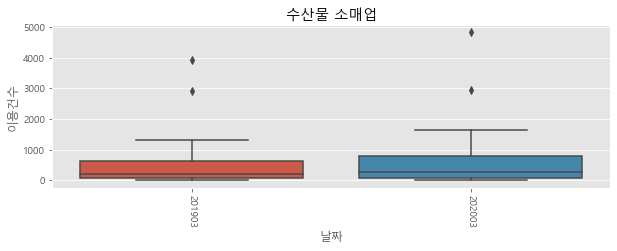

ShapiroResult(statistic=0.618815541267395, pvalue=3.132811343675712e-06)
ShapiroResult(statistic=0.6265032291412354, pvalue=3.8021414638933493e-06)
전남 지역 수산물 소매업 의 결과 : WilcoxonResult(statistic=60.5, pvalue=0.05469322204589844)


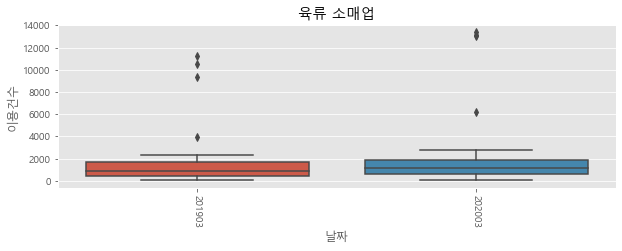

ShapiroResult(statistic=0.6199970245361328, pvalue=2.1967680368106812e-06)
ShapiroResult(statistic=0.6082505583763123, pvalue=1.631174995964102e-06)
전남 지역 육류 소매업 의 결과 : WilcoxonResult(statistic=11.0, pvalue=2.6226043701171875e-05)


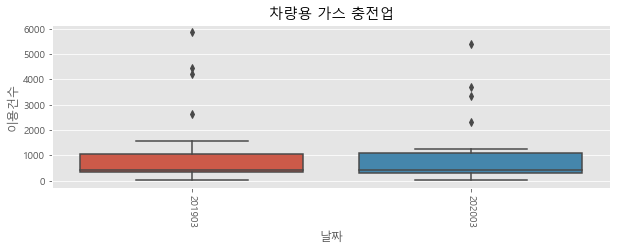

ShapiroResult(statistic=0.6716647148132324, pvalue=8.714803698239848e-06)
ShapiroResult(statistic=0.6762337684631348, pvalue=9.901970770442858e-06)
전남 지역 차량용 가스 충전업 의 결과 : WilcoxonResult(statistic=38.0, pvalue=0.0028514862060546875)


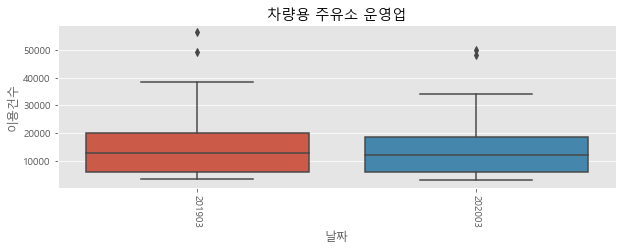

ShapiroResult(statistic=0.8144030570983887, pvalue=0.0008482448756694794)
ShapiroResult(statistic=0.8084901571273804, pvalue=0.0006814866210334003)
전남 지역 차량용 주유소 운영업 의 결과 : WilcoxonResult(statistic=10.0, pvalue=2.0503997802734375e-05)


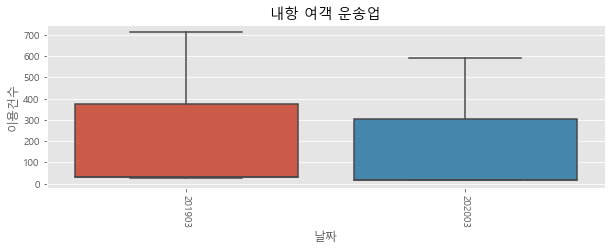

ShapiroResult(statistic=0.7565785646438599, pvalue=0.014571522362530231)
ShapiroResult(statistic=0.7552080154418945, pvalue=0.011524803936481476)
전남 지역 내항 여객 운송업 의 결과 : WilcoxonResult(statistic=0.0, pvalue=0.25)


In [91]:
for ind in pivot[pivot.시도=="전남"].업종.unique().tolist():
    rel_pvalue(pivot,"전남",ind)

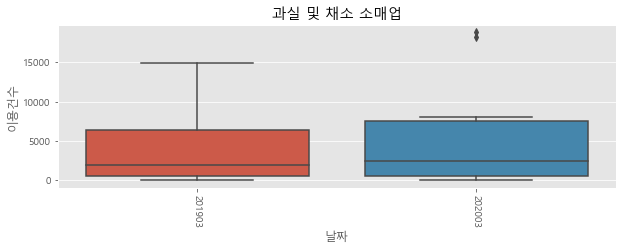

ShapiroResult(statistic=0.7592587471008301, pvalue=0.0011551938951015472)
ShapiroResult(statistic=0.7467751502990723, pvalue=0.0008244505152106285)
전북 지역 과실 및 채소 소매업 의 결과 : WilcoxonResult(statistic=6.0, pvalue=0.0008544921875)


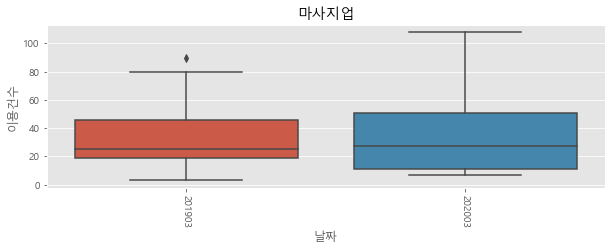

ShapiroResult(statistic=0.8372539281845093, pvalue=0.07057692110538483)
ShapiroResult(statistic=0.8612143993377686, pvalue=0.12346456944942474)
전북 지역 마사지업 의 결과 : Ttest_relResult(statistic=-0.35832003876900176, pvalue=0.7306661813652864)


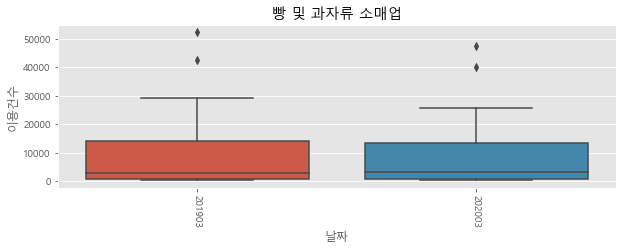

ShapiroResult(statistic=0.6963839530944824, pvalue=0.00022740295389667153)
ShapiroResult(statistic=0.7036112546920776, pvalue=0.00027169310487806797)
전북 지역 빵 및 과자류 소매업 의 결과 : WilcoxonResult(statistic=51.0, pvalue=0.638671875)


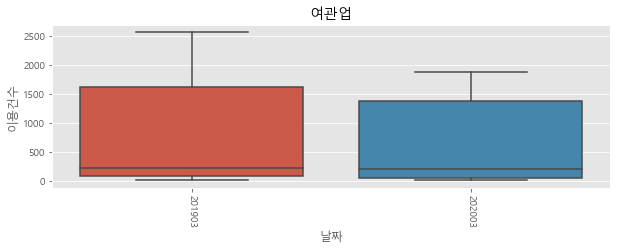

ShapiroResult(statistic=0.8040335178375244, pvalue=0.007614468224346638)
ShapiroResult(statistic=0.7884806990623474, pvalue=0.004990297369658947)
전북 지역 여관업 의 결과 : WilcoxonResult(statistic=19.0, pvalue=0.068115234375)


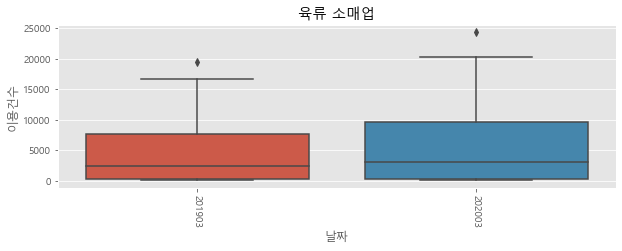

ShapiroResult(statistic=0.7617732286453247, pvalue=0.0012375771766528487)
ShapiroResult(statistic=0.764365017414093, pvalue=0.0013290928909555078)
전북 지역 육류 소매업 의 결과 : WilcoxonResult(statistic=3.0, pvalue=0.00030517578125)


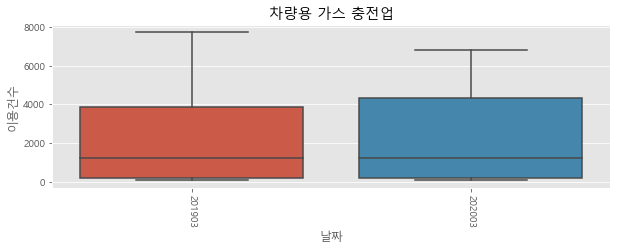

ShapiroResult(statistic=0.8399682641029358, pvalue=0.016276655718684196)
ShapiroResult(statistic=0.8138728737831116, pvalue=0.007447137497365475)
전북 지역 차량용 가스 충전업 의 결과 : WilcoxonResult(statistic=28.5, pvalue=0.153076171875)


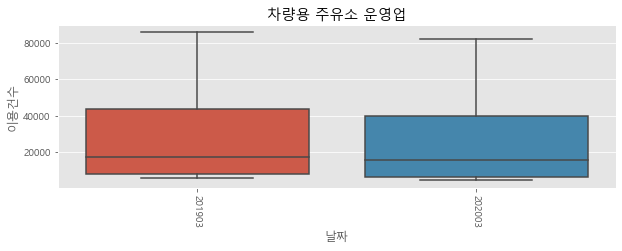

ShapiroResult(statistic=0.831364631652832, pvalue=0.009562761522829533)
ShapiroResult(statistic=0.8249399662017822, pvalue=0.00782397948205471)
전북 지역 차량용 주유소 운영업 의 결과 : WilcoxonResult(statistic=3.0, pvalue=0.00030517578125)


In [93]:
for ind in pivot[pivot.시도=="전북"].업종.unique().tolist():
    rel_pvalue(pivot,"전북",ind)

#### 광주

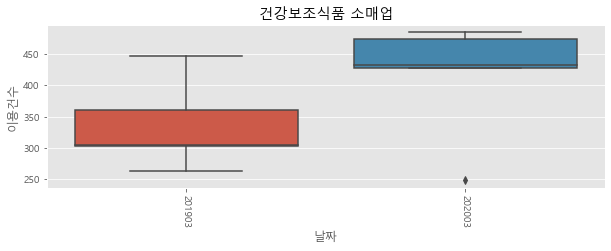

ShapiroResult(statistic=0.9139398336410522, pvalue=0.4916243851184845)
ShapiroResult(statistic=0.7744314074516296, pvalue=0.049334801733493805)
광주 지역 건강보조식품 소매업 의 결과 : WilcoxonResult(statistic=3.0, pvalue=0.3125)


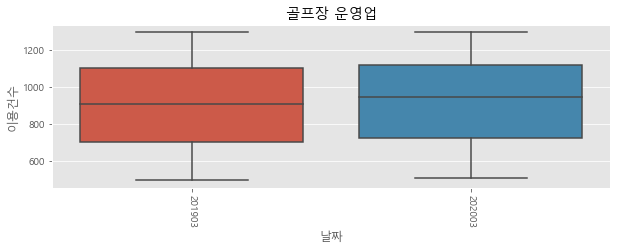

ShapiroResult(statistic=0.9995405673980713, pvalue=0.9590615034103394)
ShapiroResult(statistic=0.9962229132652283, pvalue=0.882549524307251)
광주 지역 골프장 운영업 의 결과 : Ttest_relResult(statistic=-1.5118578920369088, pvalue=0.26970325665977846)


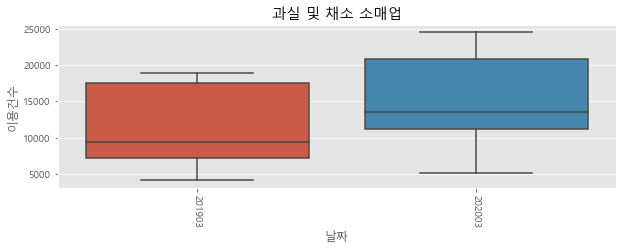

ShapiroResult(statistic=0.9013578295707703, pvalue=0.41743573546409607)
ShapiroResult(statistic=0.9705183506011963, pvalue=0.8785701990127563)
광주 지역 과실 및 채소 소매업 의 결과 : Ttest_relResult(statistic=-3.509457242725282, pvalue=0.024684018037775684)


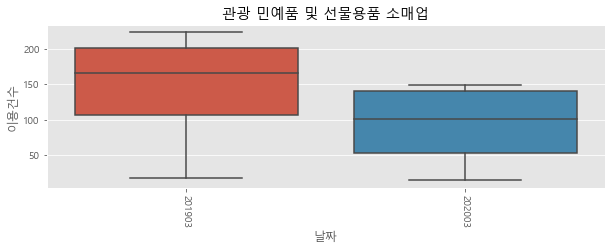

ShapiroResult(statistic=0.916845440864563, pvalue=0.5194100141525269)
ShapiroResult(statistic=0.9088409543037415, pvalue=0.47628283500671387)
광주 지역 관광 민예품 및 선물용품 소매업 의 결과 : Ttest_relResult(statistic=1.5321420831108024, pvalue=0.22300878128661264)


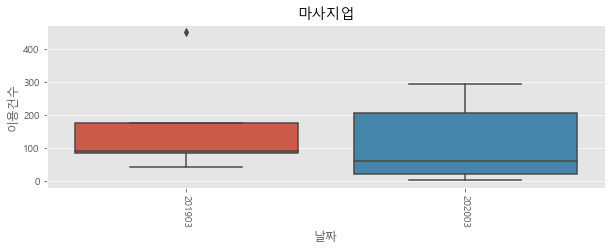

ShapiroResult(statistic=0.7894027829170227, pvalue=0.0662342756986618)
ShapiroResult(statistic=0.8772278428077698, pvalue=0.29693713784217834)
광주 지역 마사지업 의 결과 : Ttest_relResult(statistic=1.6634128995499833, pvalue=0.17156298516426083)


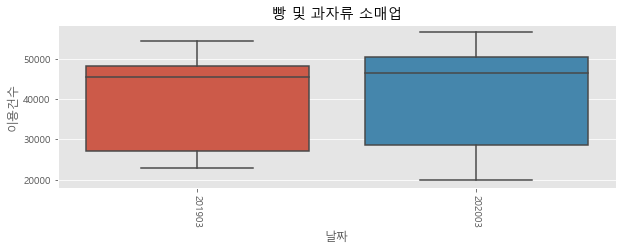

ShapiroResult(statistic=0.8874765634536743, pvalue=0.34457361698150635)
ShapiroResult(statistic=0.9173117280006409, pvalue=0.5127480626106262)
광주 지역 빵 및 과자류 소매업 의 결과 : Ttest_relResult(statistic=-0.7856694151527763, pvalue=0.47598911262732957)


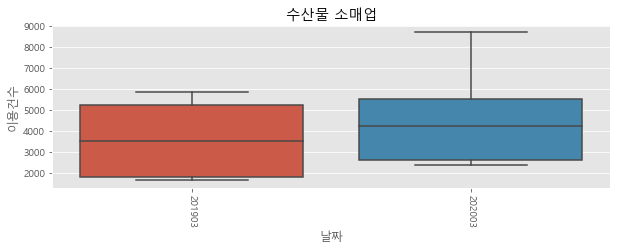

ShapiroResult(statistic=0.8869629502296448, pvalue=0.3420620858669281)
ShapiroResult(statistic=0.9019271731376648, pvalue=0.42062845826148987)
광주 지역 수산물 소매업 의 결과 : Ttest_relResult(statistic=-2.385698870465883, pvalue=0.07551986933802664)


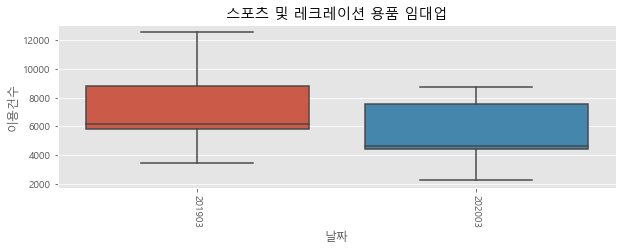

ShapiroResult(statistic=0.951807975769043, pvalue=0.7500971555709839)
ShapiroResult(statistic=0.944258451461792, pvalue=0.6961806416511536)
광주 지역 스포츠 및 레크레이션 용품 임대업 의 결과 : Ttest_relResult(statistic=3.7036359143063042, pvalue=0.02076925661178292)


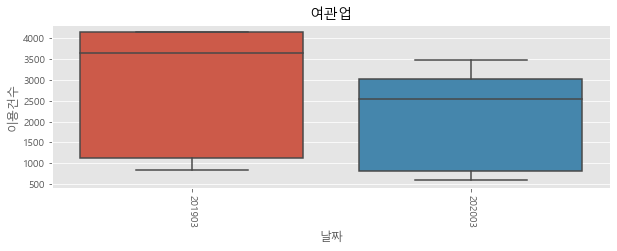

ShapiroResult(statistic=0.7804939150810242, pvalue=0.055661045014858246)
ShapiroResult(statistic=0.874695897102356, pvalue=0.2859623432159424)
광주 지역 여관업 의 결과 : Ttest_relResult(statistic=2.857026367362974, pvalue=0.046067578466625785)


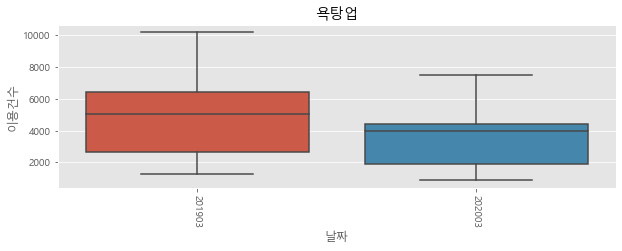

ShapiroResult(statistic=0.9681597352027893, pvalue=0.8633164167404175)
ShapiroResult(statistic=0.9562588930130005, pvalue=0.7817226648330688)
광주 지역 욕탕업 의 결과 : Ttest_relResult(statistic=2.8423484836212225, pvalue=0.04675632545638598)


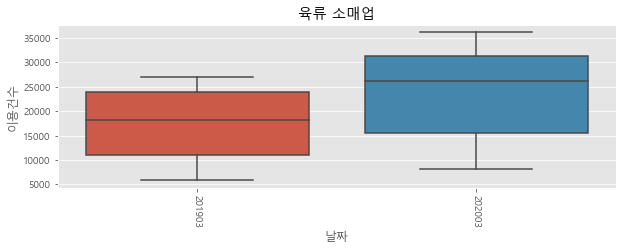

ShapiroResult(statistic=0.9519059658050537, pvalue=0.7507964372634888)
ShapiroResult(statistic=0.9517769813537598, pvalue=0.7498762011528015)
광주 지역 육류 소매업 의 결과 : Ttest_relResult(statistic=-4.93533174059758, pvalue=0.007842892182608936)


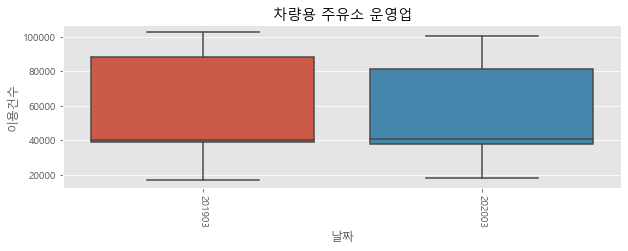

ShapiroResult(statistic=0.9009484052658081, pvalue=0.41514962911605835)
ShapiroResult(statistic=0.9231550693511963, pvalue=0.5504945516586304)
광주 지역 차량용 주유소 운영업 의 결과 : Ttest_relResult(statistic=1.0570365709269782, pvalue=0.3501064540629603)


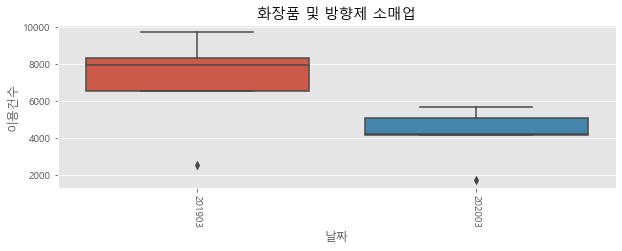

ShapiroResult(statistic=0.8965545892715454, pvalue=0.39113691449165344)
ShapiroResult(statistic=0.8931580781936646, pvalue=0.37323275208473206)
광주 지역 화장품 및 방향제 소매업 의 결과 : Ttest_relResult(statistic=4.766262705125593, pvalue=0.008864345861641462)


In [94]:
for ind in pivot[pivot.시도=="광주"].업종.unique().tolist():
    rel_pvalue(pivot,"광주",ind)